# VolTRE Tutorial

In [1]:
from os.path import join
import random
import numpy as np

# all experiments are reproducible 
# NOTE: in the jupyter one must run all cells in order to have reproducible results! No reseeds when just running a cell.
random.seed(42)

from parse.quickparse import quickparse
from volume.slice_volume import slice_volume
from sample.sample import sample, DurationSamplerMode, sample_ambig


In [2]:
## PARSE

# get a tre from the experiment files and parse it
ctx = quickparse(join('experiments', 'spec_00.tre'))
print(f"Parsed the expression {ctx.getText()}.")


Parsed the expression (<a>_[0,2]+<b>_[0,1])*.



(0, 1) 4*T**4/3
(1, 2) -2*T**4 + 40*T**3/3 - 20*T**2 + 40*T/3 - 10/3
(2, 3) -2*T**4 + 40*T**3/3 - 20*T**2 + 40*T/3 - 10/3
(3, 4) 3*T**4 - 140*T**3/3 + 250*T**2 - 1580*T/3 + 1205/3
(4, 5) 7*T**4/4 - 80*T**3/3 + 130*T**2 - 620*T/3 + 245/3
(5, 6) -13*T**4/8 + 245*T**3/6 - 1505*T**2/4 + 8885*T/6 - 48665/24
(6, 7) -T**4 + 155*T**3/6 - 965*T**2/4 + 5645*T/6 - 29225/24
(7, 8) T**4/4 - 55*T**3/6 + 505*T**2/4 - 4645*T/6 + 42805/24
(8, 9) T**4/4 - 55*T**3/6 + 505*T**2/4 - 4645*T/6 + 42805/24
(9, 10) T**4/24 - 5*T**3/3 + 25*T**2 - 500*T/3 + 1250/3



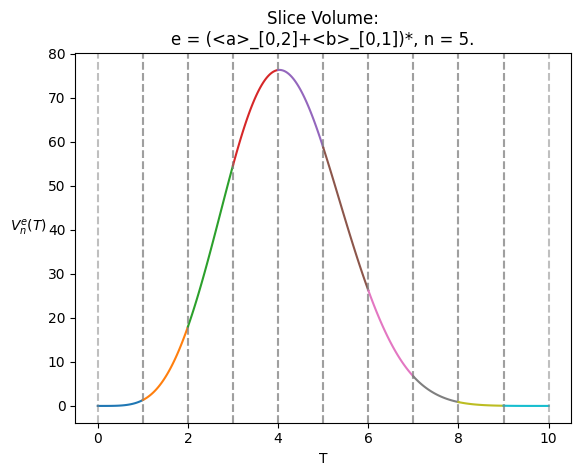

In [3]:
## VOLUMES

# set fixed length n
n = 5

# create volume function from the syntax tree
V = slice_volume(ctx, n)

# this gives a nice print of the segments
V.fancy_print()

# plot the function
V.plot()


In [4]:
# SETUP FOR SAMPLING

nr_samples = 10

In [5]:
## SAMPLING VANILLA

# This is true uniform sampling (i.e. all words have the same density).

# create samples using the vanilla sampler (this is the default setting)
for _ in range(nr_samples):

    # generates a TimedWord object
    w = sample(ctx, n)

    # we print the duration to see that the duration is always in the intervals above, and more dense in the middle
    print(f"w = {w}.", f" duration = {w.duration}")

w = (0.522, a),(1.332, a),(0.740, a),(0.999, a),(0.989, b).  duration = 4.58266017457936
w = (0.909, b),(1.356, a),(0.195, b),(0.185, a),(1.623, a).  duration = 4.267838338389993
w = (1.074, a),(1.104, a),(1.704, a),(0.092, a),(1.278, a).  duration = 5.25096744496841
w = (0.309, b),(0.494, a),(1.700, a),(0.123, b),(0.597, a).  duration = 3.2232946682488546
w = (1.625, a),(1.809, a),(0.949, a),(1.950, a),(0.803, b).  duration = 7.13553908187896
w = (0.633, a),(0.803, a),(1.532, a),(0.821, b),(0.002, a).  duration = 3.7900555167580023
w = (0.832, a),(0.296, b),(1.189, a),(0.239, b),(0.093, a).  duration = 2.6487402321363334
w = (0.763, a),(1.691, a),(0.240, b),(0.597, b),(1.297, a).  duration = 4.587985071004368
w = (1.549, a),(0.572, a),(1.712, a),(0.116, b),(1.100, a).  duration = 5.04957730678143
w = (1.202, a),(0.619, b),(1.393, a),(0.467, b),(0.399, a).  duration = 4.078975406649988


In [6]:
## SAMPLING VANILLA ON A SLICE

# fix the duration T
T = 3.7

for _ in range(nr_samples):

    w = sample(ctx, n, T)

    # this time we just check whether they are all in the slice
    print(f"w = {w}.", f" duration = {w.duration}")

w = (0.869, a),(0.161, a),(0.936, a),(0.142, b),(1.593, a).  duration = 3.7
w = (0.100, a),(0.423, a),(1.147, a),(1.624, a),(0.407, a).  duration = 3.7
w = (0.625, b),(1.909, a),(0.225, b),(0.179, a),(0.761, a).  duration = 3.7
w = (1.605, a),(0.522, a),(0.874, b),(0.593, a),(0.106, a).  duration = 3.7
w = (0.083, a),(0.510, b),(0.880, b),(1.263, a),(0.964, a).  duration = 3.7
w = (0.773, b),(0.082, b),(1.627, a),(0.160, a),(1.058, a).  duration = 3.7
w = (0.167, b),(0.944, b),(0.905, b),(0.409, b),(1.275, a).  duration = 3.7
w = (0.407, a),(0.133, a),(1.992, a),(0.349, b),(0.818, b).  duration = 3.7
w = (0.218, b),(0.953, b),(0.017, b),(1.585, a),(0.926, a).  duration = 3.7
w = (0.739, a),(0.962, a),(0.330, a),(1.362, a),(0.308, a).  duration = 3.7


Raised an exception since the vanilla mode was used in an unbounded setting. This is the volume function:


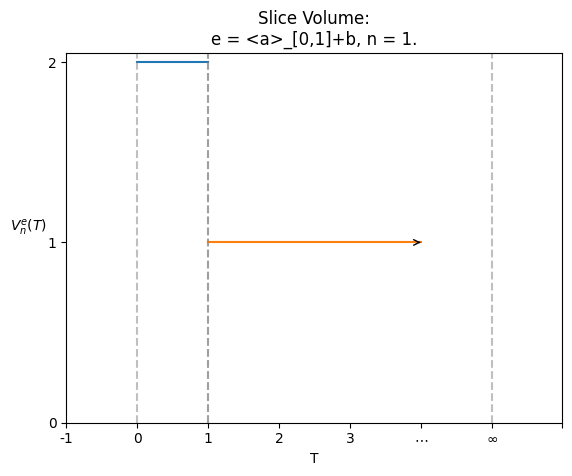

In [7]:
## VANILLA ONLY WORKS ON BOUNDED EXPRESSIONS

ctx2 = quickparse(join('experiments', 'spec_11_unbounded.tre'))
n2 = 1

try:
    w = sample(ctx2, n)
except AssertionError:
    print('Raised an exception since the vanilla mode was used in an unbounded setting. This is the volume function:')
    V_unbounded = slice_volume(ctx2, n2)
    V_unbounded.plot()
          


In [8]:
## MAXIMUM ENTROPY PARAMETERS

np.random.seed(42)  # here I use a different rng and need to seed it

# here we generalize the notion of uniform sampling to mean "sampling with maximum language entropy"
mode = DurationSamplerMode.MAX_ENT

# generate the volume normally
V2 = slice_volume(ctx2, n2)  # this is the same as V_unbounded as before, but repeated for typical usecase


# this mode works on any expression, but we need to parameterize it. Assume we want to fix mean and variance:

from volume.tuning import parameterize_mean_variance, lambdas

mu = 10
sigma_2 = 3
lambda_vec = parameterize_mean_variance(mu, sigma_2, V2) # doesn't work currently

Target mu is [ 10 103]
inferred lambda is [ 3.33334221 -0.1666671 ]
mu(inferred_lambda) = [ 10. 103.]
Loss is 3.6714217617710066e-25


In [9]:
## MAXIMUM ENTROPY SAMPLING
nr_samples2 = 1000

durations = []

# create samples using the vanilla sampler (this is the default setting)
for _ in range(nr_samples2):

    # generates a TimedWord object
    w = sample(ctx2, 1, mode=mode, lambdas=lambda_vec)

    # save the duration to a list
    durations.append(w.duration)

    if _ < 10:
        # now durations could be long, but on average we should be close to the target mean and variance
        print(f"w = {w}.", f" duration = {w.duration}")
    if _ == 10:
        print('...')

durations = np.asarray(durations)
print(f"sample mean: {durations.mean()}")
print(f"sample variance: {durations.var()}")

w = (5.336, b).  duration = 5.3364061062684
w = (10.608, b).  duration = 10.6075229021058
w = (11.121, b).  duration = 11.1208871000149
w = (9.684, b).  duration = 9.68430675109598
w = (7.510, b).  duration = 7.50964151019787
w = (12.259, b).  duration = 12.2590530822689
w = (11.684, b).  duration = 11.6843898021199
w = (8.191, b).  duration = 8.19062624678083
w = (9.133, b).  duration = 9.13260246715731
w = (11.434, b).  duration = 11.4338773604758
...
sample mean: 9.99604427779765
sample variance: 2.91883015998766
